##### 03 December 2020
##### Mirbek Toktogaraev 
##### Data Analysis for Mailbird STEP 2 (Predict (1 or 0) who is likely to convert and who is not)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [72]:
#Reading csv files.
task1 = pd.read_csv('/Users/mirbek/Desktop/mailbird/DA-dataset-1.txt', delimiter="\t")
task2 = pd.read_csv('/Users/mirbek/Desktop/mailbird/DA-dataset-2.txt', delimiter="\t")

In [75]:
#Overview of dataframes
task1.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated
0,0,zoho,male,40.0,4,7.2500,No
1,1,gmail,female,56.0,4,71.2833,Yes
2,1,zoho,female,44.0,2,7.9250,No
3,1,gmail,female,53.0,4,53.1000,No
4,0,zoho,male,53.0,2,8.0500,No


In [74]:
task2.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated
0,1,zoho,male,52.5,2,7.8292,NaN
1,2,zoho,female,65.0,4,7.0000,No
2,3,yahoo,male,80.0,2,9.6875,NaN
3,4,zoho,male,45.0,2,8.6625,No
4,5,zoho,female,40.0,4,12.2875,No


In [73]:
#I will rename a column in dataframe task2 to keep them identical.
task2 = task2.rename(columns={"Yestivated": "Activated"})

In [76]:
#891 rows and 7 columns
task1.shape

(891, 7)

In [77]:
#418 rows and 7 columns
task2.shape

(418, 7)

In [8]:
#From the Eda part I know that there are null values in "Age" and "Activated" columns in the 1st dataframe.
task1.isnull().sum()

Customer      0
ESP           0
Sex           0
Age          25
Account       0
Revenue       0
Activated    79
dtype: int64

In [9]:
#There are some null values in Revenue and Activated columns in the 2nd dataframe.
task2.isnull().sum()

Customer      0
ESP           0
Sex           0
Age           0
Account       0
Revenue       1
Activated    46
dtype: int64

# Data Preprocessing - NA treatment

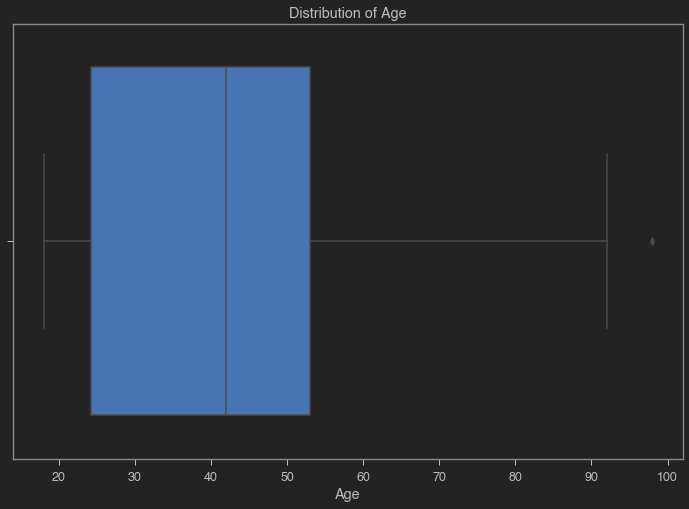

In [78]:
#Before I start Imputing Age, I will check distributions of Age. 
plt.figure(figsize=(12, 8))
sns.boxplot(x=task1["Age"]);
plt.title('Distribution of Age');

In [79]:
#Since there are several columns related to the customers, I can use these columns as predictors and fill null values in Age. 
#For this reason I will use KNNImputer from skilearn library.
#I will take 4 columns to create new temproary dataframe to use them as predictors.
df = task1[['Customer', "ESP","Sex", "Revenue"]]
#Since KNN Imputer accepts only numerical values I will modify temporary dataframe using one-hot encoding. 
df = pd.get_dummies(task1)
df.head()

,Customer,Age,Account,Revenue,ESP_gmail,ESP_yahoo,ESP_zoho,Sex_female,Sex_male,Activated_No,Activated_Yes
0,0,40.0,4,7.2500,0,0,1,0,1,1,0
1,1,56.0,4,71.2833,1,0,0,1,0,0,1
2,1,44.0,2,7.9250,0,0,1,1,0,1,0
3,1,53.0,4,53.1000,1,0,0,1,0,1,0
4,0,53.0,2,8.0500,0,0,1,0,1,1,0


In [80]:
#KNN Imputer is a distance-based imputation method and it requires normalization. 
#Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Customer,Age,Account,Revenue,ESP_gmail,ESP_yahoo,ESP_zoho,Sex_female,Sex_male,Activated_No,Activated_Yes
0,0.0,0.2750,1.0,0.014151,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.4750,1.0,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.3250,0.5,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.4375,1.0,0.103644,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.4375,0.5,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [82]:
#Impute null values in Age column using 3 neighbors
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.head()

,Customer,Age,Account,Revenue,ESP_gmail,ESP_yahoo,ESP_zoho,Sex_female,Sex_male,Activated_No,Activated_Yes
0,0.0,0.2750,1.0,0.014151,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.4750,1.0,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.3250,0.5,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.4375,1.0,0.103644,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.4375,0.5,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [83]:
#I will inverse temporary dataframe again to real values.
df = scaler.inverse_transform(df)
#Inversing values will create array. I will transform it again to dataframe and cut Age column.
df = pd.DataFrame(data = df)
task1.Age = df[1].round() # 1 is Age column
del df
task1.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated
0,0,zoho,male,40.0,4,7.2500,No
1,1,gmail,female,56.0,4,71.2833,Yes
2,1,zoho,female,44.0,2,7.9250,No
3,1,gmail,female,53.0,4,53.1000,No
4,0,zoho,male,53.0,2,8.0500,No


In [84]:
#Nulls in Age column are successfully imputed.
task1.isnull().sum()

Customer      0
ESP           0
Sex           0
Age           0
Account       0
Revenue       0
Activated    79
dtype: int64

In [85]:
#Next is Activated. Since NA's are less than 10% of total observations, I will impute them with Simple Imputer from sklearn using "most-frequent" strategy
#But first I will save column names, because after applying Simple Imputer it will reset column names.

#dataframe # 1
task1_columns = task1.columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(task1)
task1 = pd.DataFrame(imp.transform(task1), columns = task1_columns)
task1.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated
0,0,zoho,male,40,4,7.25,No
1,1,gmail,female,56,4,71.2833,Yes
2,1,zoho,female,44,2,7.925,No
3,1,gmail,female,53,4,53.1,No
4,0,zoho,male,53,2,8.05,No


In [86]:
#dataframe # 2

task2_columns = task2.columns
imp.fit(task2)
task2 = pd.DataFrame(imp.transform(task2), columns = task2_columns)
task2.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated
0,1,zoho,male,52.5,2,7.8292,No
1,2,zoho,female,65,4,7,No
2,3,yahoo,male,80,2,9.6875,No
3,4,zoho,male,45,2,8.6625,No
4,5,zoho,female,40,4,12.2875,No


In [89]:
#There are no more null values in our dataframes
print(task1.isnull().sum())
print(task2.isnull().sum())

Customer     0
ESP          0
Sex          0
Age          0
Account      0
Revenue      0
Activated    0
dtype: int64
Customer     0
ESP          0
Sex          0
Age          0
Account      0
Revenue      0
Activated    0
dtype: int64


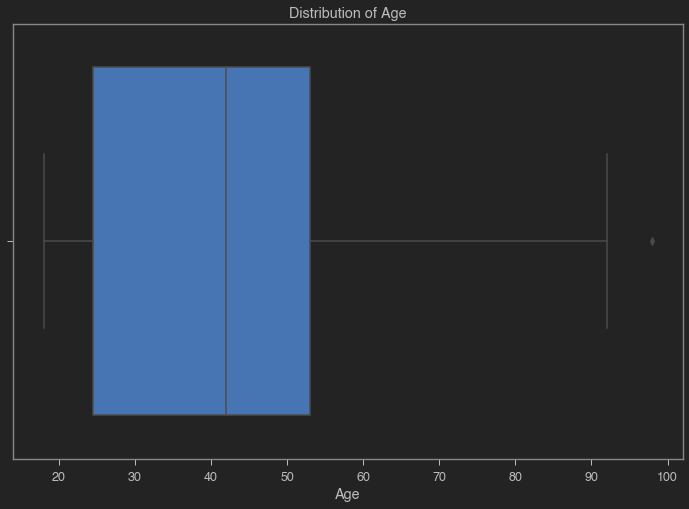

In [90]:
#Check the distribution of cutomers by Age after imputing Age. I didn't affect distribution of Age during imputation.
plt.figure(figsize=(12, 8))
sns.boxplot(x=task1["Age"]);
plt.title('Distribution of Age');

In [91]:
#I will again create a new column "Age binned" and encode it later before modelling.
task1['Age_binned'] = pd.cut(x=task1['Age'], bins=[1, 19, 29, 39, 49, 59, 69, 79, 120], labels=['0-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'])
task2['Age_binned'] = pd.cut(x=task2['Age'], bins=[1, 19, 29, 39, 49, 59, 69, 79, 120], labels=['0-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'])

### Save csv file to pass Flourish studio

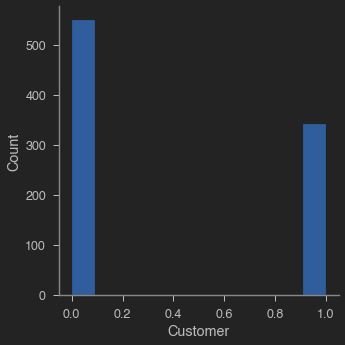

In [92]:
#Check target value. As we can see it's a bit imbalanced. Since there is a small dataset I will upsample class 1. Avoid biased predictions.
sns.displot(task1, x="Customer");

In [93]:
# Class count
count_class_0, count_class_1 = task1.Customer.value_counts()

# Divide by class
df_class_0 = task1[task1['Customer'] == 0]
df_class_1 = task1[task1['Customer'] == 1]

Random over-sampling:
1    549
0    549
Name: Customer, dtype: int64


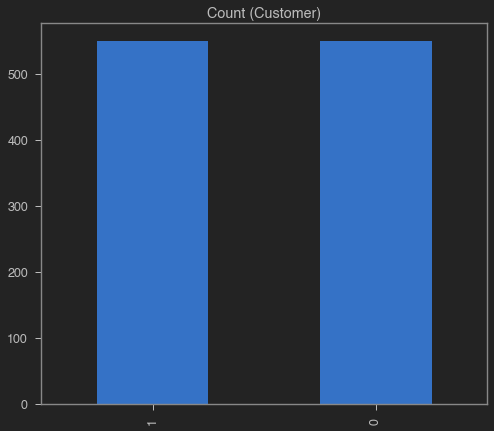

In [94]:
#Random oversampling "class 1"
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.Customer.value_counts())

df_over.Customer.value_counts().plot(kind='bar', title='Count (Customer)');

In [95]:
#Since ML algorithms are good with numbers I will change categorical values into numerical.

df_over['Sex'].replace(['female','male'],[0,1],inplace=True)
df_over['Activated'].replace(['No','Yes'],[0,1],inplace=True)

task2['Sex'].replace(['female', 'male'],[0,1], inplace=True)
task2['Activated'].replace(['No','Yes'],[0,1],inplace=True)

In [97]:
#One hot encoding
df_over = pd.get_dummies(data=df_over, columns=['ESP','Age_binned'])
task2 = pd.get_dummies(data=task2, columns=['ESP','Age_binned'])

In [98]:
#Drop customer column in the 2nd dataframe. It should be identical with the training data.
task2 = task2.drop('Customer',1)

In [99]:
#Scale the 1st dataframe 
df = pd.DataFrame(scaler.fit_transform(df_over), columns = df_over.columns)
df.head()

,Customer,Sex,Age,Account,Revenue,Activated,ESP_gmail,ESP_yahoo,ESP_zoho,Age_binned_0-19,Age_binned_20-29,Age_binned_30-39,Age_binned_40-49,Age_binned_50-59,Age_binned_60-69,Age_binned_70-79,Age_binned_80+
0,0.0,1.0,0.2750,1.00,0.014151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.4375,0.50,0.015713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0000,0.50,0.016510,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.6750,0.50,0.101229,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0250,0.25,0.041136,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
#Scale the 2nd dataframe 
task2 = pd.DataFrame(scaler.fit_transform(task2), columns = task2.columns)
task2.head()

,Sex,Age,Account,Revenue,Activated,ESP_gmail,ESP_yahoo,ESP_zoho,Age_binned_0-19,Age_binned_20-29,Age_binned_30-39,Age_binned_40-49,Age_binned_50-59,Age_binned_60-69,Age_binned_70-79,Age_binned_80+
0,1.0,0.453947,0.5,0.015282,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.618421,1.0,0.013663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.815789,0.5,0.018909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.355263,0.5,0.016908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.289474,1.0,0.023984,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
#Drop target value in the 1st dataset, too
X = df.drop('Customer', 1)
y = df['Customer']

In [102]:
#Splitting 1st dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
#Since there are many columns I will apply PCA
#PCA for 1st dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [103]:
#PCA for 2nd dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df2 = pca.fit_transform(task2)

In [105]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + ' ' + str(accuracy_score(y_test, y_pred)))

[[132  21]
 [ 70 107]]
Accuracy 0.7242424242424242


In [107]:
#Making poredictions for given 2nd dataframe
task2_pred = classifier.predict(df2)

In [108]:
df = pd.DataFrame(data=step_pred, columns=["prediction"])
df.head()

,prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [109]:
df.to_csv("predictions.csv", index =False)